In [1]:
import math                          
import numpy as np                   
import pandas as pd                  
import scipy                         
import statsmodels.api as sm        
import matplotlib.pyplot as plt            
import seaborn as sns               
sns.set() 
import sys
sys.setrecursionlimit(1500)

In [2]:
#Step1=Preprocessing of DataSet

df=pd.read_csv('updated_Final_Report.csv',encoding='latin1')
df

,date,title,content
0,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,The Daman and Diu administration on Wednesday ...
1,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,"From her special numbers to TV?appearances, Bo..."
2,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,The Indira Gandhi Institute of Medical Science...
3,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,Hotels in Mumbai and other Indian cities are t...
...,...,...,...
4510,"24 Feb 2017,Friday",Rasna seeking ?250 cr revenue from snack categ...,"Mumbai, Feb 23 (PTI) Fruit juice concentrate m..."
4511,"03 Aug 2017,Thursday",Sachin attends Rajya Sabha after questions on ...,Former cricketer Sachin Tendulkar was spotted ...
4512,"03 Aug 2017,Thursday",Shouldn't rob their childhood: Aamir on kids r...,"Aamir Khan, whose last film Dangal told the st..."
4513,"07 Dec 2016,Wednesday","Asha Bhosle gets ?53,000 power bill for unused...",Maharahstra Power Minister Chandrashekhar Bawa...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4515 entries, 0 to 4514
Data columns (total 3 columns):
date       4515 non-null object
title      4515 non-null object
content    4397 non-null object
dtypes: object(3)
memory usage: 105.9+ KB


In [4]:
content=df['content'][1]
content

'From her special numbers to TV?appearances, Bollywood actor Malaika Arora Khan has managed to carve her own identity. The actor, who made her debut in the Hindi film industry with the blockbuster debut opposite Shah Rukh Khan in Chaiyya Chaiyya from Dil Se (1998), is still remembered for the song. However, for trolls, she is a woman first and what matters right now is that she divorced a ?rich man?.  On Wednesday, Malaika Arora shared a gorgeous picture of herself on Instagram and a follower decided to troll her for using her ?alumni? (read alimony) money to wear ?short clothes and going to gym or salon?. Little did he/she know that the Munni Badnam star would reply with the perfect comeback. Take a look at the interaction:     Super excited to be affiliated with Khanna Jewellers @khannajewellerskj as their brand ambassador. Crafted to perfection, their stunning statement jewellery is a must have for every jewellery lover. #khannajewellers...#maksquad?? #hair @hairbypriyanka #stylist 

In [5]:
import re
content=re.sub('[^a-zA-Z]',' ',df['content'][1])
content=content.lower()
content
# Convert the text into lowercase and remove the ^,"",' and !

'from her special numbers to tv appearances  bollywood actor malaika arora khan has managed to carve her own identity  the actor  who made her debut in the hindi film industry with the blockbuster debut opposite shah rukh khan in chaiyya chaiyya from dil se         is still remembered for the song  however  for trolls  she is a woman first and what matters right now is that she divorced a  rich man    on wednesday  malaika arora shared a gorgeous picture of herself on instagram and a follower decided to troll her for using her  alumni   read alimony  money to wear  short clothes and going to gym or salon   little did he she know that the munni badnam star would reply with the perfect comeback  take a look at the interaction      super excited to be affiliated with khanna jewellers  khannajewellerskj as their brand ambassador  crafted to perfection  their stunning statement jewellery is a must have for every jewellery lover   khannajewellers    maksquad    hair  hairbypriyanka  stylist 

In [6]:
content=content.split()
content

['from',
 'her',
 'special',
 'numbers',
 'to',
 'tv',
 'appearances',
 'bollywood',
 'actor',
 'malaika',
 'arora',
 'khan',
 'has',
 'managed',
 'to',
 'carve',
 'her',
 'own',
 'identity',
 'the',
 'actor',
 'who',
 'made',
 'her',
 'debut',
 'in',
 'the',
 'hindi',
 'film',
 'industry',
 'with',
 'the',
 'blockbuster',
 'debut',
 'opposite',
 'shah',
 'rukh',
 'khan',
 'in',
 'chaiyya',
 'chaiyya',
 'from',
 'dil',
 'se',
 'is',
 'still',
 'remembered',
 'for',
 'the',
 'song',
 'however',
 'for',
 'trolls',
 'she',
 'is',
 'a',
 'woman',
 'first',
 'and',
 'what',
 'matters',
 'right',
 'now',
 'is',
 'that',
 'she',
 'divorced',
 'a',
 'rich',
 'man',
 'on',
 'wednesday',
 'malaika',
 'arora',
 'shared',
 'a',
 'gorgeous',
 'picture',
 'of',
 'herself',
 'on',
 'instagram',
 'and',
 'a',
 'follower',
 'decided',
 'to',
 'troll',
 'her',
 'for',
 'using',
 'her',
 'alumni',
 'read',
 'alimony',
 'money',
 'to',
 'wear',
 'short',
 'clothes',
 'and',
 'going',
 'to',
 'gym',
 'or',

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
content=[ps.stem(word) for word in content if not word in set(stopwords.words('english'))]
content
#remove all the non relevent words(the,an,its etc)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['special',
 'number',
 'tv',
 'appear',
 'bollywood',
 'actor',
 'malaika',
 'arora',
 'khan',
 'manag',
 'carv',
 'ident',
 'actor',
 'made',
 'debut',
 'hindi',
 'film',
 'industri',
 'blockbust',
 'debut',
 'opposit',
 'shah',
 'rukh',
 'khan',
 'chaiyya',
 'chaiyya',
 'dil',
 'se',
 'still',
 'rememb',
 'song',
 'howev',
 'troll',
 'woman',
 'first',
 'matter',
 'right',
 'divorc',
 'rich',
 'man',
 'wednesday',
 'malaika',
 'arora',
 'share',
 'gorgeou',
 'pictur',
 'instagram',
 'follow',
 'decid',
 'troll',
 'use',
 'alumni',
 'read',
 'alimoni',
 'money',
 'wear',
 'short',
 'cloth',
 'go',
 'gym',
 'salon',
 'littl',
 'know',
 'munni',
 'badnam',
 'star',
 'would',
 'repli',
 'perfect',
 'comeback',
 'take',
 'look',
 'interact',
 'super',
 'excit',
 'affili',
 'khanna',
 'jewel',
 'khannajewellerskj',
 'brand',
 'ambassador',
 'craft',
 'perfect',
 'stun',
 'statement',
 'jewelleri',
 'must',
 'everi',
 'jewelleri',
 'lover',
 'khannajewel',
 'maksquad',
 'hair',
 'hairbypri

In [8]:
content=' '.join(content)
content

'special number tv appear bollywood actor malaika arora khan manag carv ident actor made debut hindi film industri blockbust debut opposit shah rukh khan chaiyya chaiyya dil se still rememb song howev troll woman first matter right divorc rich man wednesday malaika arora share gorgeou pictur instagram follow decid troll use alumni read alimoni money wear short cloth go gym salon littl know munni badnam star would repli perfect comeback take look interact super excit affili khanna jewel khannajewellerskj brand ambassador craft perfect stun statement jewelleri must everi jewelleri lover khannajewel maksquad hair hairbypriyanka stylist manekaharisinghani manag ektakauroberoi mua subbu photograph prasdnaik post share malaika arora khan malaikaarorakhanoffici aug pdt malaika decid repli entir convers prove matter woman success attack moment decid step bound societi decid apart success woman live life term malaika liter play role tradit prescrib woman marri quit earli son rais alway around k

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,200):
    content=re.sub('[^a-zA-Z]',
                   ' ',
                   str(df['content'][i]))
    content=content.lower()
    content=content.split()
    ps=PorterStemmer()
    content=[ps.stem(word) for word in content if not word in set(stopwords.words('english'))]
    content=' '.join(content)
    corpus.append(content)
corpus
#Make a corpus of  relvent text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['daman diu administr wednesday withdrew circular ask women staff tie rakhi male colleagu order trigger backlash employe rip apart social media union territori administr forc retreat within hour issu circular made compulsori staff celebr rakshabandhan workplac decid celebr festiv rakshabandhan august connect offic depart shall remain open celebr festiv collect suitabl time wherein ladi staff shall tie rakhi colleagu order issu august gurpreet singh deputi secretari personnel said ensur one skip offic attend report sent govern next even two notif one mandat celebr rakshabandhan left withdraw mandat right issu daman diu administr day apart circular withdrawn one line order issu late even ut depart personnel administr reform circular ridicul sensit involv govern dictat tie rakhi maintain profession workplac offici told hindustan time earlier day refus identifi notic issu daman diu administr former gujarat home minist praful kodabhai patel direct sourc said rakshabandhan celebr bond brothe

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

x= vectorizer.fit_transform(corpus).toarray()
features=vectorizer.fit_transform(corpus)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
len(x[0])
#Number of words in corpus

7328

In [12]:
x.shape
#Shape of the x

(200, 7328)

In [13]:
#Step2=Clustering of data

In [14]:
from matplotlib import pyplot
from pandas import DataFrame
import seaborn as sns 
import pandas as pd
from sklearn.metrics import silhouette_score


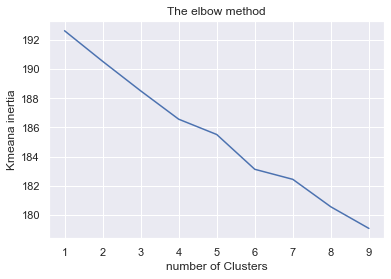

In [15]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

pyplot.plot(range(1,10),wcss) 
pyplot.title("The elbow method")
pyplot.xlabel("number of Clusters")
pyplot.ylabel("Kmeana inertia")
pyplot.show()

In [16]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_mean=kmeans.fit_predict(x)
y_means=pd.DataFrame(y_mean)
y_means=y_means.rename(columns={0:'Clusters'})
y_means

,Clusters
0,2
1,4
2,2
3,0
4,3
...,...
195,1
196,3
197,1
198,1


In [17]:
x=pd.DataFrame(x)
Final_Report=pd.concat([x,y_means],axis=1)
Final_Report

,0,1,2,3,4,5,6,7,8,9,...,7319,7320,7321,7322,7323,7324,7325,7326,7327,Clusters
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.050052,0.0,0.050052,0.0,0.0,0.0,0.041877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
196,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
197,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
198,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [18]:
Final_Report.to_csv('Final_Report.csv', index=False)

In [19]:
# To visualize, we’ll plot the features in a 2D space. 
#As we know the dimension of features that 
#we obtained from TfIdfVectorizer is quite large ( > 2100,
#we need to reduce the dimension before we can plot. 
#For this, we’ll ues PCA to transform our high dimensional 
#features into 2 dimensions.

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

reduced_features = pca.fit_transform(features.toarray())# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)

In [21]:
reduced_features=pd.DataFrame(reduced_features)
reduced_features=reduced_features.rename(columns={0:'Feature1',1:'Feature2'})
reduced_features

,Feature1,Feature2
0,0.141937,0.010055
1,-0.093648,0.101888
2,0.004449,-0.039627
3,-0.040472,-0.188450
4,-0.043570,-0.091961
...,...,...
195,-0.121061,0.187377
196,-0.055187,-0.122600
197,-0.215303,0.397840
198,-0.159500,0.347870


In [22]:
Final_Report=pd.concat([reduced_features,y_means],axis=1)
Final_Report

,Feature1,Feature2,Clusters
0,0.141937,0.010055,2
1,-0.093648,0.101888,4
2,0.004449,-0.039627,2
3,-0.040472,-0.188450,0
4,-0.043570,-0.091961,3
...,...,...,...
195,-0.121061,0.187377,1
196,-0.055187,-0.122600,3
197,-0.215303,0.397840,1
198,-0.159500,0.347870,1


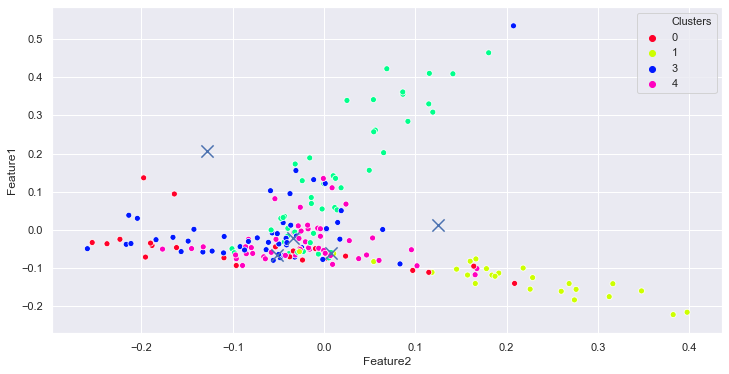

In [23]:
pyplot.figure(figsize=(12,6))
sns.scatterplot(y='Feature1',x='Feature2',data=Final_Report,hue='Clusters',palette='gist_rainbow')
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
pyplot.legend()
pyplot.show()

In [24]:
#Evaluation with unlabelled dataset

#The best value is 1 and the worst value is -1. 
#Values near 0 indicate overlapping clusters. 
#Negative values generally indicate that a sample has been assigned to the wrong cluster, 
#as a different cluster is more similar.
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=kmeans.predict(features))

0.007165813835731704

In [25]:
#So this value means that our clusters are overlapping. 
#We can also see this in the plot above. 
#Perhaps tuning different parameters for feature extractor 
#and the clustering model will increase this score.


In [26]:
Final_Report['Clusters'].value_counts()


4    52
3    51
2    47
1    25
0    25
Name: Clusters, dtype: int64

In [27]:
print("Done")

Done


In [28]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            


In [29]:
get_top_keywords(features,y_mean,vectorizer.get_feature_names(),30)


Cluster 0
new,museum,two,plane,one,space,best,command,also,post,kill,kushner,secur,milit,girl,bodi,report,abu,forc,haj,kashmir,said,presid,beach,scaramucci,polic,white,dujana,hous,trump

Cluster 1
seen,said,cbfc,want,salman,thing,make,set,also,role,song,year,htshowbiz,director,toilet,releas,rukh,bollywood,like,peopl,kapoor,shah,star,akshay,work,show,sunil,say,actor,film

Cluster 2
cabinet,rajya,meet,kumar,also,virgin,farmer,bihar,modi,leader,lalu,issu,univers,legisl,ask,chief,alleg,nitish,sabha,colleg,gujarat,form,state,mla,parti,congress,bjp,govern,said,minist

Cluster 3
told,case,offic,allegedli,vehicl,travel,secur,cow,weapon,station,north,two,india,road,found,say,woman,man,arm,delhi,peopl,kumar,court,govern,test,year,state,pm,said,polic

Cluster 4
team,food,peopl,minist,crew,take,would,airport,get,googl,new,director,khan,offici,today,pilot,nan,fire,year,rs,time,pti,india,airlin,flight,delhi,air,passeng,compani,said


In [30]:
Final_Report=pd.concat([df,y_means],axis=1)
Final_Report=Final_Report.dropna()


In [31]:
Final_Report['Clusters'].value_counts()

3.0    51
4.0    51
2.0    47
1.0    25
0.0    25
Name: Clusters, dtype: int64

In [32]:
Final_Report['Clusters']=Final_Report['Clusters'].replace({0:'Bollywood',1:'Crime',2:'Politcis',3:'International',4:'Games',})

In [33]:
Final_Report

,date,title,content,Clusters
0,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,The Daman and Diu administration on Wednesday ...,Politcis
1,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,"From her special numbers to TV?appearances, Bo...",Games
2,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,The Indira Gandhi Institute of Medical Science...,Politcis
3,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Bollywood
4,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,Hotels in Mumbai and other Indian cities are t...,International
...,...,...,...,...
195,"31 Jul 2017,Monday",Jolie denies report of using cruel casting pro...,Angelina Jolie says accounts of her casting pr...,Crime
196,"31 Jul 2017,Monday",Man steals designer saris for wife to wear at ...,"Srikant Gupta?s wallet did not permit it, but ...",International
197,"31 Jul 2017,Monday",I went mad on Twitter after watching Bajirao M...,Bollywood actor Shahid Kapoor says his upcomin...,Crime
198,"31 Jul 2017,Monday",Akshay is different from the notion of a super...,Akshay Kumar never fails to impress his co-sta...,Crime


In [34]:
Final_Report['Clusters'].value_counts()

International    51
Games            51
Politcis         47
Bollywood        25
Crime            25
Name: Clusters, dtype: int64

In [35]:
Final_Report['Clusters']

0           Politcis
1              Games
2           Politcis
3          Bollywood
4      International
           ...      
195            Crime
196    International
197            Crime
198            Crime
199            Games
Name: Clusters, Length: 199, dtype: object

In [36]:
Final_Report[Final_Report['Clusters']=='Crime']
# Select any news from Movie Category

,date,title,content,Clusters
13,"03 Aug 2017,Thursday",Human embryos edited to stop deadly disease fo...,Scientists have modified human embryos to remo...,Crime
28,"02 Aug 2017,Wednesday",Veteran actor Dilip Kumar hospitalised in Mumbai,Yesteryear superstar Dilip Kumar was rushed to...,Crime
41,"02 Aug 2017,Wednesday",Sunil Pal accuses director Bazmee of non-payme...,After accusing director Anees Bazme and his fr...,Crime
46,"02 Aug 2017,Wednesday","Ramdev, Sonakshi to judge bhajan reality show:...","Life OK, which is geared up to re-brand itself...",Crime
47,"02 Aug 2017,Wednesday",Ask psychiatrist why Censors fear female sexua...,Naseeruddin Shah has watched the film Lipstick...,Crime
48,"02 Aug 2017,Wednesday",Sleeping on film sets is a gifted moment in sc...,"Bollywood star Amitabh Bachchan, who is curren...",Crime
55,"02 Aug 2017,Wednesday",Release of Shraddha Kapoor's 'Haseena Parkar' ...,Shraddha Kapoor?s ambitious project Haseena Pa...,Crime
57,"02 Aug 2017,Wednesday",CBFC member made sexist remark: Babumoshai Ban...,The CBFC (Central Board of Film Certification)...,Crime
58,"02 Aug 2017,Wednesday",Can't believe a normal hug with Salman was tre...,Actor Sana Khan was up for a not-so-pleasant s...,Crime
59,"02 Aug 2017,Wednesday","Used to get scared of online rape, acid attack...","Actor Dia Mirza, who was in Delhi to walk for ...",Crime


In [37]:
Final_Report[(Final_Report['Clusters']=='Crime') & (Final_Report['date']=='03 Aug 2017,Thursday')]
# Select news from movie category on a partcular date and time....

,date,title,content,Clusters
13,"03 Aug 2017,Thursday",Human embryos edited to stop deadly disease fo...,Scientists have modified human embryos to remo...,Crime


In [38]:
Final_Report.sample(n=10)
#Select any 10 news randomly from the corpus

,date,title,content,Clusters
16,"03 Aug 2017,Thursday",Indian athlete indicted on sex abuse charge in US,A 24-year-old Indian athlete has been indicted...,International
51,"02 Aug 2017,Wednesday","Teacher stripped girls for poor marks, school ...",A teacher of a private school in Haridwar dist...,International
186,"31 Jul 2017,Monday",Majority of Indian Muslims are descendants of ...,Majority of Muslims in India are descendants o...,Politcis
32,"03 Aug 2017,Thursday",US Prez Donald Trump called White House a real...,US President Donald Trump has called the White...,Bollywood
5,"03 Aug 2017,Thursday","Man found dead at Delhi police station, kin al...",An alleged suspect in a kidnapping case was fo...,International
53,"02 Aug 2017,Wednesday",British American Tobacco under probe over brib...,Allegations that British American Tobacco was ...,Games
2,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,The Indira Gandhi Institute of Medical Science...,Politcis
87,"02 Aug 2017,Wednesday",Female teacher suspended for getting a massage...,A woman teacher in Odisha?s Sambalpur district...,Politcis
61,"02 Aug 2017,Wednesday","Bible, Quran removed from Abdul Kalam's Tamil ...",Indian authorities have removed a copy of the ...,International
154,"01 Aug 2017,Tuesday",Over 21 lakh Indians applied for H-1B visa in ...,More than 21 lakh Indian technology profession...,Politcis
